In [65]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importing data

In [9]:
data=pd.read_csv("Position_Salaries.csv")

In [10]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


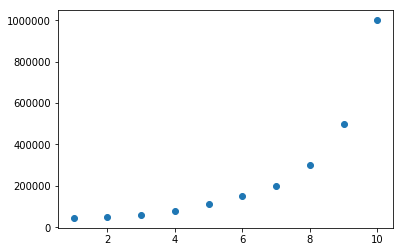

In [6]:
plt.scatter(data.Level, data.Salary)

In [11]:
X=data.iloc[:,1:2].values
y=data.iloc[:,-1].values

In [13]:
X.shape

(10, 1)

In [14]:
y.shape

(10,)

## Performing train-test-split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [61]:
X_train.shape

(8, 1)

In [62]:
X_test.shape

(2, 1)

In [63]:
y_train.shape

(8,)

In [64]:
y_test.shape

(2,)

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [20]:
L.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
y_pred=L.predict(X_test)

In [25]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred)*100)
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 97.79215014976273
RMSE 32689.437552745294


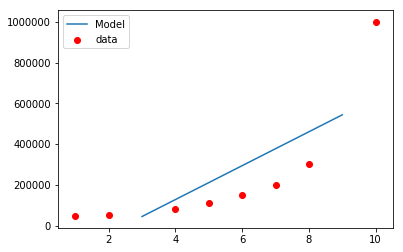

In [26]:
plt.plot(X_test,L.predict(X_test),label="Model")
plt.scatter(X_train,y_train,label="data", color="r")
plt.legend()
plt.show()

## Polynomial Regression

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)

In [50]:
X_poly = poly.fit_transform(X_train)
print(X_poly.shape)
X_poly

(8, 6)


array([[1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03]])

In [51]:
L1 = LinearRegression()
L1.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
X_test_poly =poly.fit_transform(X_test)

In [53]:
y_pred=L1.predict(X_test_poly)

In [59]:
print("R2 score",r2_score(y_test,y_pred)*100)
print("MSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 99.43664415853243
MSE 16512.547570569055


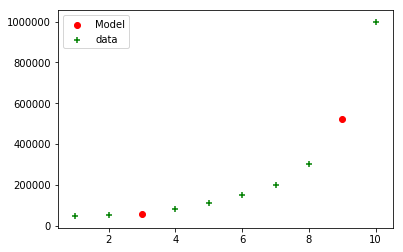

In [60]:
plt.scatter(X_test,y_pred, label="Model",color='red')
plt.scatter(X_train, y_train, label="data", marker='+',color='green')
plt.legend()
plt.show()

## checking for best degree

In [56]:
i=5
def polynomialRegression(X,y,k=i):

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

  poly = PolynomialFeatures(degree=k)
  X_poly = poly.fit_transform(X_train)
  lr = LinearRegression()
  lr.fit(X_poly,y_train)
  
  X_test_poly =poly.fit_transform(X_test)
  y_pred=lr.predict(X_test_poly)

  training_score = r2_score(y_train, lr.predict(X_poly))
  test_score = r2_score(y_test,y_pred)
  
  return training_score, test_score

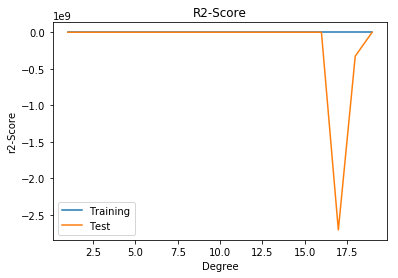

In [58]:
train=[]
test=[]
for i in range(1,20):
  r2train,r2test=polynomialRegression(X,y,k=i)
  train.append(r2train)
  test.append(r2test)
x=np.arange(19)+1
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("r2-Score")
plt.title("R2-Score");
plt.show()

# The best value for the degree parameter can be taken 5